[]

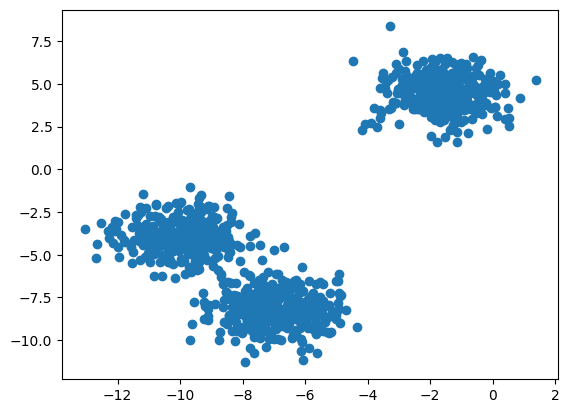

In [138]:
import sklearn.datasets as data
import matplotlib.pyplot as plt

X, clusters = data.make_blobs(n_samples=1000, n_features=2, cluster_std=1.0, random_state=1)
plt.scatter(X[:, 0], X[:, 1])
plt.plot()

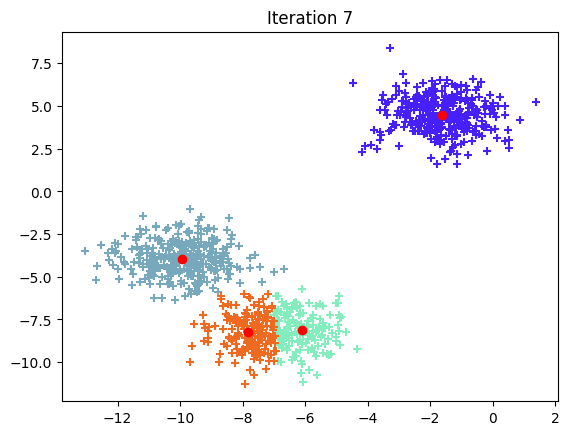

In [139]:
import numpy as np
from IPython.display import display
from IPython.display import clear_output
import time

k = 4

centroid_indices = (np.random.rand(k) * len(X)).astype('int')
centroids = []
for centroid_index in centroid_indices:
    centroids.append(X[centroid_index])
    
previous_memberships =  np.zeros(len(X))
memberships = np.ones(len(X))
colors = []
for i in range(0, k):
        colors.append(np.random.rand(3,1).flatten())

iterations = 0
while(sum(previous_memberships) != sum(memberships)):
    iterations = iterations + 1
    previous_memberships = memberships.copy()
    plt.clf()
    # Update memberships
    for (index, (X_ind, membership)) in enumerate(zip(X, memberships)):
        centroid_distances = []
        for centroid in centroids:
            distance = (X_ind[0] - centroid[0]) ** 2 + (X_ind[1] - centroid[1]) ** 2 # It should have square root, but it is still a continuous function, so computing it would be worthless and would waste computing time
            centroid_distances.append(distance)
        memberships[index] = np.argmin(centroid_distances)

    # Update centroids
    for (index, centroid) in enumerate(centroids):
        X_boolean = memberships == index
        X_filtered = X[X_boolean]
        centroids[index][0] = np.average(X_filtered[:, 0])
        centroids[index][1] = np.average(X_filtered[:, 1])

    for i in range(0, k):
        X_boolean = memberships == i
        X_filtered = X[X_boolean]
        centroids_x = [item[0] for item in centroids]
        centroids_y = [item[1] for item in centroids]
        plt.scatter(X_filtered[:, 0], X_filtered[:, 1],  color=colors[i], marker='+')
        plt.scatter(centroids[i][0], centroids[i][1],  color='red', marker = 'o')
        plt.title(f'Iteration {iterations}')
    plt.plot()
    display(plt.gcf())
    clear_output(wait=True)